In [1]:
import os
import sys
from pathlib import Path
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from rdkit import Chem
#from rdkit.Chem import Descriptors
from rdkit.Chem import rdFingerprintGenerator

ROOT = Path(os.getcwd()).parents[0]

path_data = os.path.join(Path(ROOT), "data")

In [2]:
n_points = 1000

fraction1 = int(0.3 * n_points)
fraction2 = n_points - fraction1

dummy_score_1 = 100 * np.concatenate([np.ones(fraction1), np.zeros(fraction2)])
dummy_score_1b = np.concatenate([100 * np.ones(fraction1), 95 * np.ones(fraction2)])
dummy_score_2 = 100 * np.concatenate([np.zeros(fraction1), np.ones(fraction2)])
dummy_score_2noise = dummy_score_2 + np.random.uniform(-1, 1, n_points)
dummy_score_2noise2 = dummy_score_2 + np.random.uniform(-1, 1, n_points)
dummy_score_2b = np.concatenate([95 * np.ones(fraction1), 100 * np.ones(fraction2)])
dummy_score_3 = 90 * np.ones(1000)
dummy_score_4 = 50 * np.ones(1000)

In [3]:
data = pd.DataFrame({
    "score_1": dummy_score_1,
    "score_2": dummy_score_2,
    "score_2noise": dummy_score_2noise,
    "score_2noise2": dummy_score_2noise2,
    #"score_2b": dummy_score_2b,
    "score_3": dummy_score_3,
    "score_4": dummy_score_4,
    
})
data

,score_1,score_2,score_2noise,score_2noise2,score_3,score_4
0,100.0,0.0,-0.816692,-0.209776,90.0,50.0
1,100.0,0.0,-0.859578,0.397128,90.0,50.0
2,100.0,0.0,-0.802552,0.972533,90.0,50.0
3,100.0,0.0,-0.295355,-0.593511,90.0,50.0
4,100.0,0.0,0.985940,0.871724,90.0,50.0
...,...,...,...,...,...,...
995,0.0,100.0,100.909919,99.671657,90.0,50.0
996,0.0,100.0,99.143655,100.781035,90.0,50.0
997,0.0,100.0,99.420710,99.838842,90.0,50.0
998,0.0,100.0,100.075207,100.782279,90.0,50.0


In [4]:
def calculate_ranked_list(metric_df):
    ranked = metric_df.rank(axis=1, ascending=False)
    return ranked.mean(axis=0)

ranking = calculate_ranked_list(data)
ranking

score_1          4.500
score_2          2.877
score_2noise     2.887
score_2noise2    2.936
score_3          3.400
score_4          4.400
dtype: float64

In [5]:
def score1_vs_2(ranking):
    if ranking.loc["score_1"] > ranking.loc["score_2"]:
        print("score 2 better than score 1\n")
    else:
        print("score 1 better than score 2\n")

In [12]:
n_points = 1000

fraction1 = int(0.3 * n_points)
fraction2 = n_points - fraction1

dummy_score_1 = np.concatenate([100 * np.ones(fraction1), 90 * np.ones(fraction2)])
dummy_score_1b = dummy_score_1b = np.concatenate([98 * np.ones(fraction1), 40 * np.ones(fraction2)])
dummy_score_2 = 95 * np.concatenate([np.zeros(fraction1), np.ones(fraction2)])
#dummy_score_2b = np.concatenate([95 * np.ones(fraction1), 100 * np.ones(fraction2)])
dummy_score_3 = 80 * np.ones(1000)
dummy_score_4 = 50 * np.ones(1000)


data = pd.DataFrame({
    "score_1": dummy_score_1,
    #"score_1b": dummy_score_1b,
    "score_2": dummy_score_2,
    #"score_3": dummy_score_3,
    #"score_4": dummy_score_4,
    
})
ranking = calculate_ranked_list(data)
display(ranking)
score1_vs_2(ranking)


data = pd.DataFrame({
    "score_1": dummy_score_1,
    #"score_1b": dummy_score_1b,
    "score_2": dummy_score_2,
    "score_3": dummy_score_3,
    #"score_4": dummy_score_4,
    
})
ranking = calculate_ranked_list(data)
display(ranking)
score1_vs_2(ranking)


data = pd.DataFrame({
    "score_1": dummy_score_1,
    "score_1b": dummy_score_1b,
    "score_2": dummy_score_2,
    "score_3": dummy_score_3,
    #"score_4": dummy_score_4,
    
})
ranking = calculate_ranked_list(data)
display(ranking)
score1_vs_2(ranking)


data = pd.DataFrame({
    "score_1": dummy_score_1,
    #"score_1b": dummy_score_1b,
    "score_2": dummy_score_2,
    "score_3": dummy_score_3,
    "score_4": dummy_score_4,
    
})
ranking = calculate_ranked_list(data)
display(ranking)
score1_vs_2(ranking)

# all
print("Mean values:\n")
data = pd.DataFrame({
    "score_1": dummy_score_1,
    "score_1b": dummy_score_1b,
    "score_2": dummy_score_2,
    "score_3": dummy_score_3,
    "score_4": dummy_score_4,
    
})
print(data.mean(axis=0))

score_1    1.7
score_2    1.3
dtype: float64

score 2 better than score 1



score_1    1.7
score_2    1.6
score_3    2.7
dtype: float64

score 2 better than score 1



score_1     1.7
score_1b    3.4
score_2     1.9
score_3     3.0
dtype: float64

score 1 better than score 2



score_1    1.7
score_2    1.9
score_3    2.7
score_4    3.7
dtype: float64

score 1 better than score 2

Mean values:

score_1     93.0
score_1b    57.4
score_2     66.5
score_3     80.0
score_4     50.0
dtype: float64


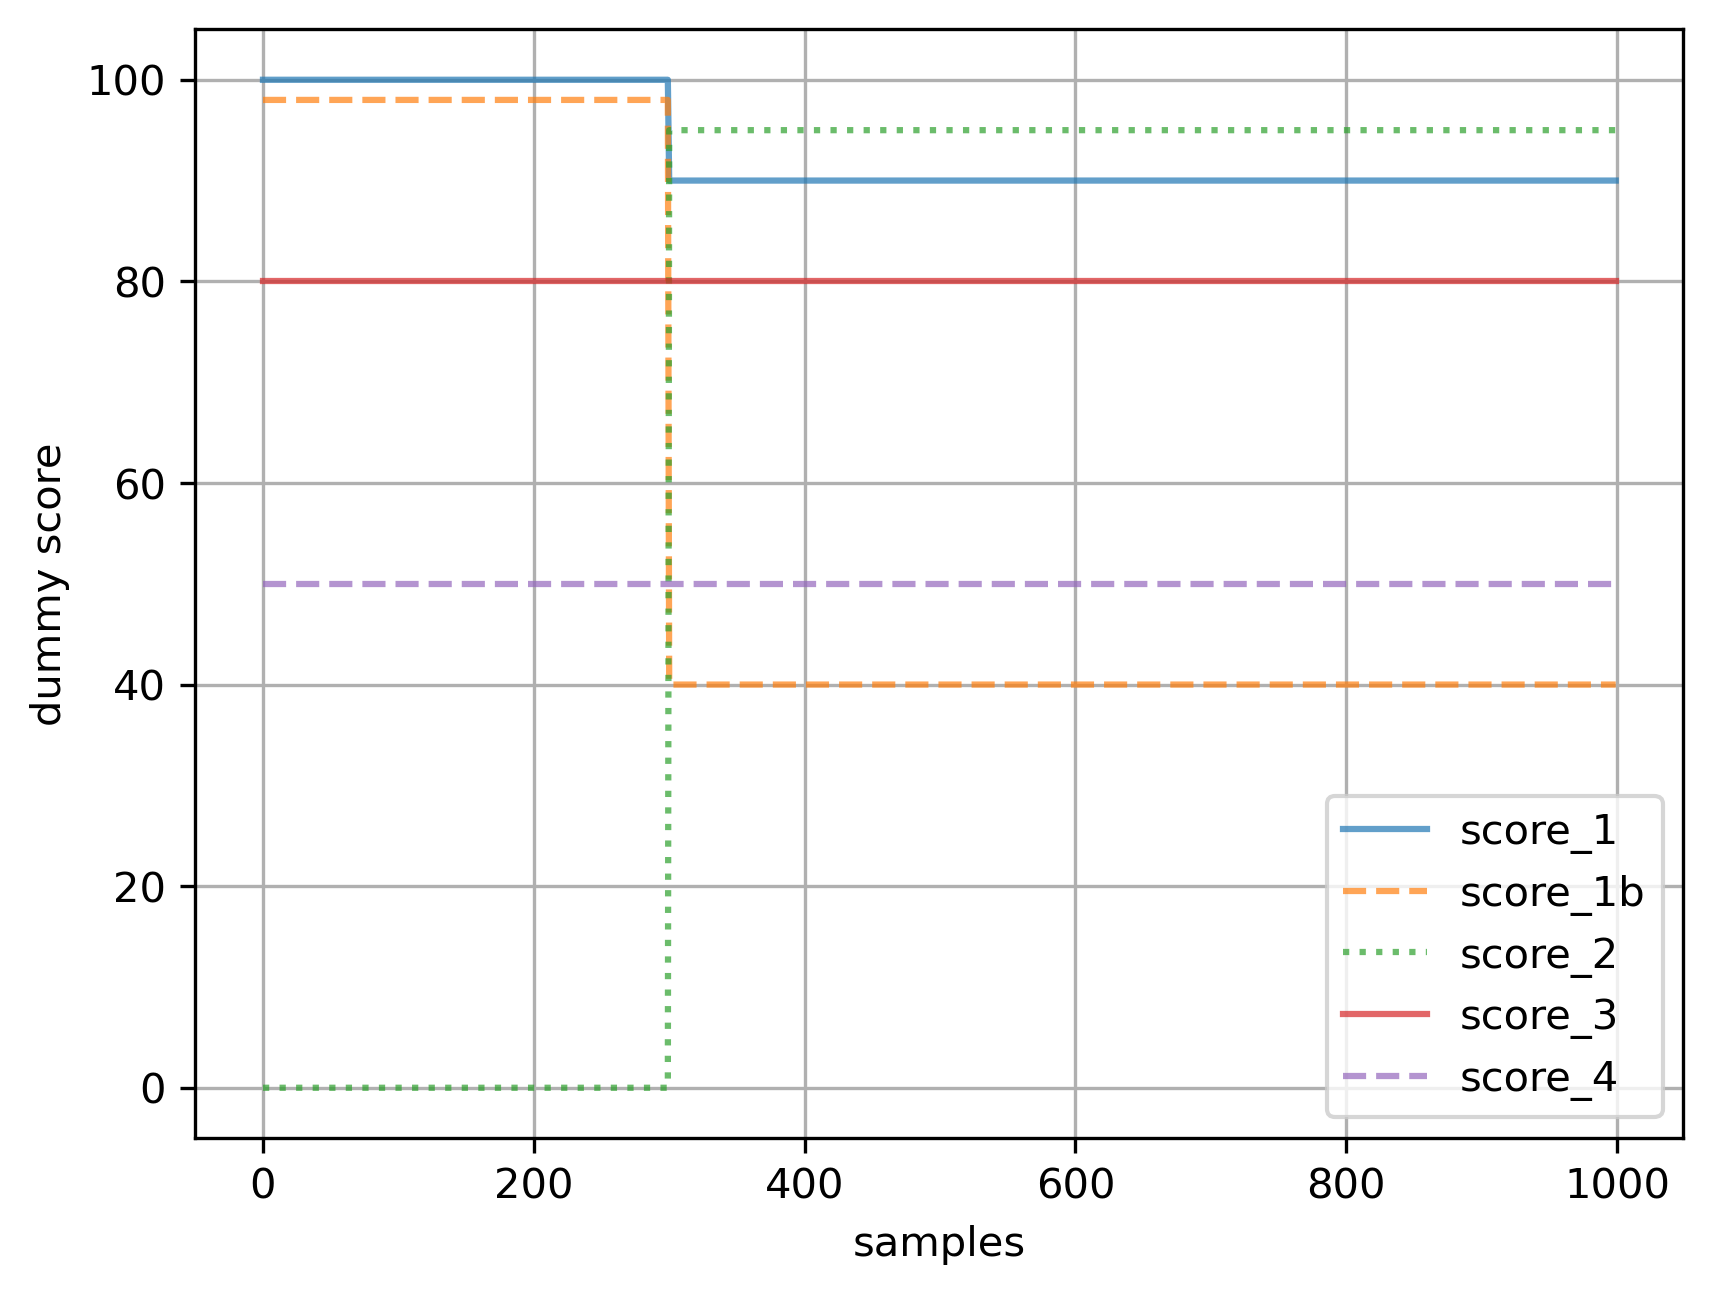

In [13]:
fig, ax = plt.subplots(dpi=300)

line_types = ["-", "--", ":", "-", "--"]

for i, x in enumerate(data):
    ax.plot(data[x], line_types[i], #"--",
            alpha=0.7, label=x)
    
ax.set_xlabel("samples")
ax.set_ylabel("dummy score")

plt.legend()
plt.grid(True)